# Predicting Diabetes

## Import Libraries

In [17]:
import pandas as pd                   #pandas is a dataframe library
import matplotlib.pyplot as plt      #metaplotlib.pyplot plots data
import numpy as np                    #numpy provides N-dim object support

# do ploting in inline instead of in a separate window
%matplotlib inline

## Load and review data

In [7]:
df = pd.read_csv("./data/pima-data.csv")        # load pima data

In [8]:
df.shape

(768, 10)

In [9]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


# Check for null values

In [11]:
df.isnull().values.any()

False

## Ploting for removing the corelated clumns

In [12]:
def plot_corr(df, size=12):
    corr = df.corr()     # data frames corelation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)     # color codes the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  #draw y tick marks

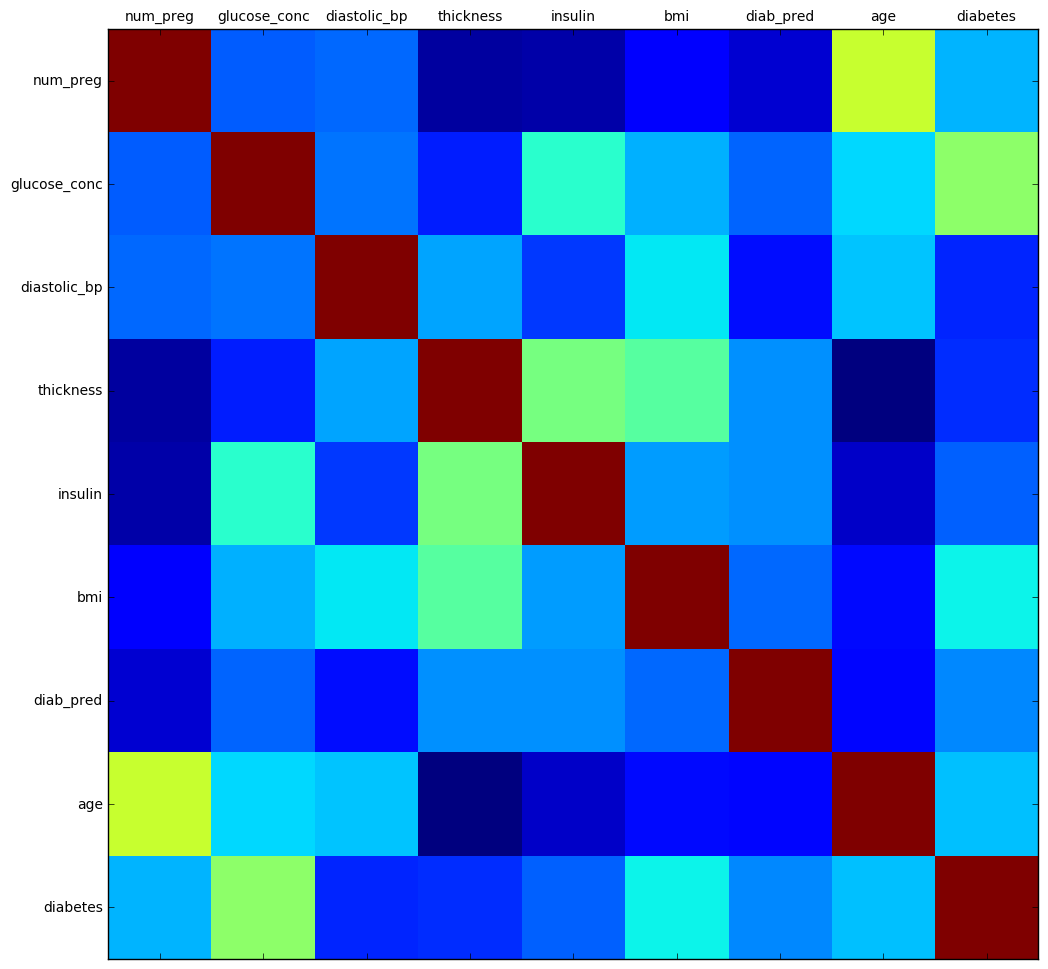

In [20]:
plot_corr(df)

In [15]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [28]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [19]:
del df['skin']

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Check for data types

### Change true to 1 and false to 0

In [22]:
diabetes_map = { True: 1, False: 0}

In [23]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [39]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True/False ratio

In [24]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f})".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f})".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 268 (34.90)
Number of False cases: 500 (65.10)


## Spliting the data
70% for training, 30% for testing

In [25]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor features columns (8 x m)
y = df[predicted_class_names].values # predictor class (1=True, 0=False) columns (1 x m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split_test_size, random_state=42)
                                    # test_size = 0.30 is 30%, 42 is the random number state

In [26]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


### varifying predicted values was split correctly

In [27]:
print("Original True: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index))*100))
print("Original False: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index))*100))
print("")
print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train))*100))
print("Training False: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train))*100))
print("")
print("Test True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_train))*100))
print("Test False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_train))*100))

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (14.90%)
Test False: 151 (28.12%)


### Post split data preparation

#### Hidden missing values

In [29]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


Are these 0 values are possible ?

How many rows have unexpected 0 values?

In [67]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc']==0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp']==0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness']==0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin']==0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi']==0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred']==0])))
print("# rows missing age: {0}".format(len(df.loc[df['age']==0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### Impute with the mean

In [35]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_O = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_O.fit_transform(X_train)
X_test = fill_O.fit_transform(X_test)

In [36]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Training initial Agorithm - Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

#Create GaussianNB Naive bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on Training data

In [46]:
nb_predict_test = nb_model.predict([5,109,75,26,26,36,0.546,60])

/home/prime/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [47]:
print("{0}".format(nb_predict_test))

[0]
